In [1]:
import pandas as pd
import re
%matplotlib inline

In [2]:
df_NK = pd.read_csv("North Korea imports - Sheet1.csv")

In [3]:
country_names = pd.read_csv("country names - Sheet1.csv")

In [4]:
df_NK.head()

,year,country_origin_id,country_destination_id,hs92_product_id,export_val,export_val_pct
0,1995,PRK,BFA,ALL,67177.77,0.00%
1,1995,PRK,CAF,ALL,514674.15,0.00%
2,1995,PRK,CIV,ALL,58011.71,0.00%
3,1995,PRK,CMR,ALL,97669.00,0.00%
4,1995,PRK,COG,ALL,24018.39,0.00%


In [5]:
df_NK.shape

(2430, 6)

In [6]:
country_names.head()

,id,id_3char,name
0,naabw,abw,Aruba
1,asafg,afg,Afghanistan
2,afago,ago,Angola
3,naaia,aia,Anguilla
4,eualb,alb,Albania


In [7]:
country_names["id_3char"] = country_names["id_3char"].str.upper()

In [8]:
country_names.head()

,id,id_3char,name
0,naabw,ABW,Aruba
1,asafg,AFG,Afghanistan
2,afago,AGO,Angola
3,naaia,AIA,Anguilla
4,eualb,ALB,Albania


In [9]:
df_NK_merged = df_NK.merge(country_names, left_on = "country_destination_id", right_on = "id_3char")

In [10]:
df_NK_merged.shape

(2429, 9)

In [11]:
df_NK_merged = df_NK_merged.drop(["id", "id_3char"], 1)

In [12]:
df_NK_merged.head()

,year,country_origin_id,country_destination_id,hs92_product_id,export_val,export_val_pct,name
0,1995,PRK,BFA,ALL,67177.77,0.00%,Burkina Faso
1,1996,PRK,BFA,ALL,141525.02,0.00%,Burkina Faso
2,1997,PRK,BFA,ALL,218335.84,0.00%,Burkina Faso
3,1998,PRK,BFA,ALL,1498090.16,0.00%,Burkina Faso
4,1999,PRK,BFA,ALL,384014.99,0.00%,Burkina Faso


In [13]:
df_countries = pd.read_csv("countries.csv", encoding='latin-1')

In [14]:
df_countries.head()

,Country,Latitude,Longitude,Name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [15]:
df_NK_merged_geo = df_NK_merged.merge(df_countries, left_on = "name", right_on = "Name")

In [16]:
df_NK_merged_geo.shape

(2336, 11)

In [17]:
df_NK_merged_geo[df_NK_merged_geo["Latitude"] == None]

,year,country_origin_id,country_destination_id,hs92_product_id,export_val,export_val_pct,name,Country,Latitude,Longitude,Name


In [18]:
df_NK_merged_geo.head()

,year,country_origin_id,country_destination_id,hs92_product_id,export_val,export_val_pct,name,Country,Latitude,Longitude,Name
0,1995,PRK,BFA,ALL,67177.77,0.00%,Burkina Faso,BF,12.238333,-1.561593,Burkina Faso
1,1996,PRK,BFA,ALL,141525.02,0.00%,Burkina Faso,BF,12.238333,-1.561593,Burkina Faso
2,1997,PRK,BFA,ALL,218335.84,0.00%,Burkina Faso,BF,12.238333,-1.561593,Burkina Faso
3,1998,PRK,BFA,ALL,1498090.16,0.00%,Burkina Faso,BF,12.238333,-1.561593,Burkina Faso
4,1999,PRK,BFA,ALL,384014.99,0.00%,Burkina Faso,BF,12.238333,-1.561593,Burkina Faso


In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [20]:
df_NK_merged_geo.describe() 

,year,export_val,Latitude,Longitude
count,2336.000,2336.000,2336.000,2336.000
mean,2005.176,14839618.529,20.433,9.537
std,5.806,122151959.635,25.072,65.321
min,1995.000,1000.000,-40.901,-177.156
25%,2000.000,135007.795,4.571,-42.604
50%,2005.000,814762.550,17.608,17.679
75%,2010.000,3901698.173,42.546,37.906
max,2015.000,2718394688.000,71.707,179.414


In [21]:
df_NK_merged_geo["export_val"].describe() 

count         2336.000
mean      14839618.529
std      122151959.635
min           1000.000
25%         135007.795
50%         814762.550
75%        3901698.173
max     2718394688.000
Name: export_val, dtype: float64

In [22]:
df_NK_merged_geo_2015 = df_NK_merged_geo[df_NK_merged_geo["year"] == 2015]

In [23]:
pd.set_option('max_colwidth',1000)

In [24]:
df_NK_merged_geo_2015

,year,country_origin_id,country_destination_id,hs92_product_id,export_val,export_val_pct,name,Country,Latitude,Longitude,Name
18,2015,PRK,BFA,ALL,32791483.140,0.09%,Burkina Faso,BF,12.238,-1.562,Burkina Faso
38,2015,PRK,CAF,ALL,71735.000,0.00%,Central African Republic,CF,6.611,20.939,Central African Republic
56,2015,PRK,CMR,ALL,206795.910,0.00%,Cameroon,CM,7.370,12.355,Cameroon
77,2015,PRK,DZA,ALL,2204895.000,0.01%,Algeria,DZ,28.034,1.660,Algeria
98,2015,PRK,EGY,ALL,5756855.840,0.02%,Egypt,EG,26.821,30.802,Egypt
118,2015,PRK,ETH,ALL,5647398.310,0.02%,Ethiopia,ET,9.145,40.490,Ethiopia
131,2015,PRK,GIN,ALL,218701.500,0.00%,Guinea,GN,9.946,-9.697,Guinea
152,2015,PRK,MDG,ALL,16113.960,0.00%,Madagascar,MG,-18.767,46.869,Madagascar
173,2015,PRK,MUS,ALL,16833.810,0.00%,Mauritius,MU,-20.348,57.552,Mauritius
194,2015,PRK,NER,ALL,379442.870,0.00%,Niger,NE,17.608,8.082,Niger


In [25]:
df_NK_merged_geo_2015.describe() 

,year,export_val,Latitude,Longitude
count,104.000,104.000,104.000,104.000
mean,2015.000,26960066.189,19.330,13.722
std,0.000,229134336.972,25.572,66.013
min,2015.000,1688.000,-35.675,-172.105
25%,2015.000,206684.280,3.501,-12.448
50%,2015.000,747204.800,15.936,19.439
75%,2015.000,3652593.657,42.081,45.527
max,2015.000,2338271127.000,71.707,179.414


In [26]:
df_NK_merged_geo_2015

,year,country_origin_id,country_destination_id,hs92_product_id,export_val,export_val_pct,name,Country,Latitude,Longitude,Name
18,2015,PRK,BFA,ALL,32791483.140,0.09%,Burkina Faso,BF,12.238,-1.562,Burkina Faso
38,2015,PRK,CAF,ALL,71735.000,0.00%,Central African Republic,CF,6.611,20.939,Central African Republic
56,2015,PRK,CMR,ALL,206795.910,0.00%,Cameroon,CM,7.370,12.355,Cameroon
77,2015,PRK,DZA,ALL,2204895.000,0.01%,Algeria,DZ,28.034,1.660,Algeria
98,2015,PRK,EGY,ALL,5756855.840,0.02%,Egypt,EG,26.821,30.802,Egypt
118,2015,PRK,ETH,ALL,5647398.310,0.02%,Ethiopia,ET,9.145,40.490,Ethiopia
131,2015,PRK,GIN,ALL,218701.500,0.00%,Guinea,GN,9.946,-9.697,Guinea
152,2015,PRK,MDG,ALL,16113.960,0.00%,Madagascar,MG,-18.767,46.869,Madagascar
173,2015,PRK,MUS,ALL,16833.810,0.00%,Mauritius,MU,-20.348,57.552,Mauritius
194,2015,PRK,NER,ALL,379442.870,0.00%,Niger,NE,17.608,8.082,Niger


In [27]:
df_NK_merged_geo_2015.sort_values(by = "export_val", ascending = False)

,year,country_origin_id,country_destination_id,hs92_product_id,export_val,export_val_pct,name,Country,Latitude,Longitude,Name
387,2015,PRK,CHN,ALL,2338271127.000,6.70%,China,CN,35.862,104.195,China
449,2015,PRK,IND,ALL,97796047.120,0.28%,India,IN,20.594,78.963,India
2214,2015,PRK,PAK,ALL,43066340.190,0.12%,Pakistan,PK,30.375,69.345,Pakistan
18,2015,PRK,BFA,ALL,32791483.140,0.09%,Burkina Faso,BF,12.238,-1.562,Burkina Faso
543,2015,PRK,SAU,ALL,25320391.050,0.07%,Saudi Arabia,SA,23.886,45.079,Saudi Arabia
1358,2015,PRK,CHL,ALL,22898770.810,0.07%,Chile,CL,-35.675,-71.543,Chile
1940,2015,PRK,PRY,ALL,16496727.350,0.05%,Paraguay,PY,-23.443,-58.444,Paraguay
1337,2015,PRK,BRA,ALL,15427466.460,0.04%,Brazil,BR,-14.235,-51.925,Brazil
1235,2015,PRK,MEX,ALL,13809874.550,0.04%,Mexico,MX,23.635,-102.553,Mexico
341,2015,PRK,ZMB,ALL,13772943.750,0.04%,Zambia,ZM,-13.134,27.849,Zambia


In [28]:
df_NK_merged_geo_2015.to_csv("df_NK_merged_geo_2015.csv")

In [29]:
df_NK_merged_geo.dtypes

year                        int64
country_origin_id          object
country_destination_id     object
hs92_product_id            object
export_val                float64
export_val_pct             object
name                       object
Country                    object
Latitude                  float64
Longitude                 float64
Name                       object
dtype: object

In [30]:
df_NK_merged_geo.to_csv("North_korea_imports.csv")

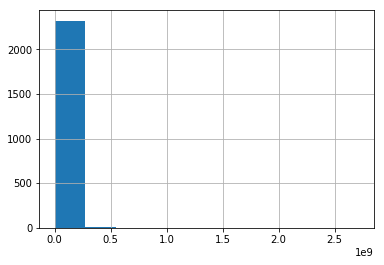

In [31]:
export_val  = df_NK_merged_geo["export_val"]
export_val.hist()

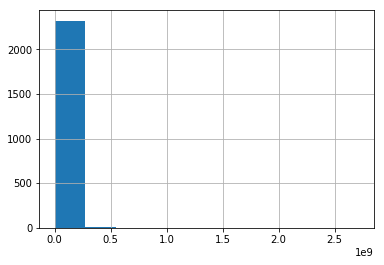

In [32]:
df_NK_merged_geo["export_val"].hist()

In [33]:
df_NK_merged_geo_2015.head()

,year,country_origin_id,country_destination_id,hs92_product_id,export_val,export_val_pct,name,Country,Latitude,Longitude,Name
18,2015,PRK,BFA,ALL,32791483.140,0.09%,Burkina Faso,BF,12.238,-1.562,Burkina Faso
38,2015,PRK,CAF,ALL,71735.000,0.00%,Central African Republic,CF,6.611,20.939,Central African Republic
56,2015,PRK,CMR,ALL,206795.910,0.00%,Cameroon,CM,7.370,12.355,Cameroon
77,2015,PRK,DZA,ALL,2204895.000,0.01%,Algeria,DZ,28.034,1.660,Algeria
98,2015,PRK,EGY,ALL,5756855.840,0.02%,Egypt,EG,26.821,30.802,Egypt


In [34]:
df_NK_merged_geo_2015["Total"] = 2803846883.6100001

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_NK_merged_geo_2015["perct_exp"] = df_NK_merged_geo_2015["export_val"] / df_NK_merged_geo_2015["Total"] * 100

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_NK_merged_geo_2015["diff_exp"] = 100 - df_NK_merged_geo_2015["perct_exp"]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_NK_merged_geo_2015

,year,country_origin_id,country_destination_id,hs92_product_id,export_val,export_val_pct,name,Country,Latitude,Longitude,Name,Total,perct_exp,diff_exp
18,2015,PRK,BFA,ALL,32791483.140,0.09%,Burkina Faso,BF,12.238,-1.562,Burkina Faso,2803846883.610,1.170,98.830
38,2015,PRK,CAF,ALL,71735.000,0.00%,Central African Republic,CF,6.611,20.939,Central African Republic,2803846883.610,0.003,99.997
56,2015,PRK,CMR,ALL,206795.910,0.00%,Cameroon,CM,7.370,12.355,Cameroon,2803846883.610,0.007,99.993
77,2015,PRK,DZA,ALL,2204895.000,0.01%,Algeria,DZ,28.034,1.660,Algeria,2803846883.610,0.079,99.921
98,2015,PRK,EGY,ALL,5756855.840,0.02%,Egypt,EG,26.821,30.802,Egypt,2803846883.610,0.205,99.795
118,2015,PRK,ETH,ALL,5647398.310,0.02%,Ethiopia,ET,9.145,40.490,Ethiopia,2803846883.610,0.201,99.799
131,2015,PRK,GIN,ALL,218701.500,0.00%,Guinea,GN,9.946,-9.697,Guinea,2803846883.610,0.008,99.992
152,2015,PRK,MDG,ALL,16113.960,0.00%,Madagascar,MG,-18.767,46.869,Madagascar,2803846883.610,0.001,99.999
173,2015,PRK,MUS,ALL,16833.810,0.00%,Mauritius,MU,-20.348,57.552,Mauritius,2803846883.610,0.001,99.999
194,2015,PRK,NER,ALL,379442.870,0.00%,Niger,NE,17.608,8.082,Niger,2803846883.610,0.014,99.986


In [38]:
df_NK_merged_geo_2015["export_val"].sum()

2803846883.6100001

In [39]:
China_exp = df_NK_merged_geo_2015[df_NK_merged_geo_2015["name"] == "China"]
India_exp = df_NK_merged_geo_2015[df_NK_merged_geo_2015["name"] == "India"]
Russia_exp = df_NK_merged_geo_2015[df_NK_merged_geo_2015["name"] == "Russia"]
Mexico_exp = df_NK_merged_geo_2015[df_NK_merged_geo_2015["name"] == "Mexico"]


In [40]:
China_exp

,year,country_origin_id,country_destination_id,hs92_product_id,export_val,export_val_pct,name,Country,Latitude,Longitude,Name,Total,perct_exp,diff_exp
387,2015,PRK,CHN,ALL,2338271127.000,6.70%,China,CN,35.862,104.195,China,2803846883.610,83.395,16.605


In [41]:
China_exp.to_csv("China_exp.csv")
India_exp.to_csv("India_exp.csv")
Russia_exp.to_csv("Russia_exp.csv")
Mexico_exp.to_csv("Mexico_exp.csv")


In [42]:
df_NK_merged_geo_2015_continent = pd.read_csv("df_NK_merged_geo_2015_continent.csv")

In [43]:
df_NK_merged_geo_2015_continent.head()

,year,country_origin_id,country_destination_id,hs92_product_id,export_val,export_val_pct,name,Country,Latitude,Longitude,Name,Continent
0,2015,PRK,ARM,ALL,39104.460,0.00%,Armenia,AM,40.069,45.038,Armenia,Asia
1,2015,PRK,BHR,ALL,292616.820,0.00%,Bahrain,BH,25.930,50.638,Bahrain,Asia
2,2015,PRK,BRN,ALL,719933.050,0.00%,Brunei,BN,4.535,114.728,Brunei,Asia
3,2015,PRK,KHM,ALL,968948.580,0.00%,Cambodia,KH,12.566,104.991,Cambodia,Asia
4,2015,PRK,CHN,ALL,2338271127.000,6.70%,China,CN,35.862,104.195,China,Asia


In [44]:
pd.set_option('display.max_rows', 150)


In [45]:
df_NK_merged_geo_2015_continent

,year,country_origin_id,country_destination_id,hs92_product_id,export_val,export_val_pct,name,Country,Latitude,Longitude,Name,Continent
0,2015,PRK,ARM,ALL,39104.460,0.00%,Armenia,AM,40.069,45.038,Armenia,Asia
1,2015,PRK,BHR,ALL,292616.820,0.00%,Bahrain,BH,25.930,50.638,Bahrain,Asia
2,2015,PRK,BRN,ALL,719933.050,0.00%,Brunei,BN,4.535,114.728,Brunei,Asia
3,2015,PRK,KHM,ALL,968948.580,0.00%,Cambodia,KH,12.566,104.991,Cambodia,Asia
4,2015,PRK,CHN,ALL,2338271127.000,6.70%,China,CN,35.862,104.195,China,Asia
5,2015,PRK,CYP,ALL,56114.740,0.00%,Cyprus,CY,35.126,33.430,Cyprus,Asia
6,2015,PRK,IND,ALL,97796047.120,0.28%,India,IN,20.594,78.963,India,Asia
7,2015,PRK,KAZ,ALL,458555.870,0.00%,Kazakhstan,KZ,48.020,66.924,Kazakhstan,Asia
8,2015,PRK,KWT,ALL,51963.710,0.00%,Kuwait,KW,29.312,47.482,Kuwait,Asia
9,2015,PRK,KGZ,ALL,3773.000,0.00%,Kyrgyzstan,KG,41.204,74.766,Kyrgyzstan,Asia


In [46]:
df_NK_merged_geo_2015_continent_grouped = df_NK_merged_geo_2015_continent.groupby("Continent")["export_val"].sum().reset_index()

In [47]:
df_NK_merged_geo_2015_continent_grouped["Total"] = 2803846883.6099997


In [48]:
df_NK_merged_geo_2015_continent_grouped["pert_exp"] = df_NK_merged_geo_2015_continent_grouped["export_val"] / df_NK_merged_geo_2015_continent_grouped["Total"] * 100

In [49]:
df_NK_merged_geo_2015_continent_grouped["diff_perc"] = 100 - df_NK_merged_geo_2015_continent_grouped["pert_exp"]

In [84]:
df_NK_merged_geo_2015_continent_grouped = df_NK_merged_geo_2015_continent_grouped[df_NK_merged_geo_2015_continent_grouped["Continent"] == "Asia"]

In [85]:
df_NK_merged_geo_2015_continent_grouped.to_csv("Asia_exp.csv")

In [51]:
df_NK_merged_geo_2015_continent_grouped

,Continent,export_val,Total,pert_exp,diff_perc
0,Asia,2555118525.220,2803846883.610,91.129,8.871
1,Other,248728358.390,2803846883.610,8.871,91.129


In [52]:
df_NK_imports = pd.read_csv("en_visualize_explore_line_hs92_import_prk_show_all_1995.2016.csv")

In [53]:
df_NK_imports.shape

(1699, 6)

In [54]:
df_NK_imports_merged = df_NK_imports.merge(country_names, left_on = "country_destination_id", right_on = "id_3char")

In [55]:
df_NK_imports_merged.shape

(1698, 9)

In [56]:
df_NK_imports_merged_2015 = df_NK_imports_merged[df_NK_imports_merged["year"] == 2015]

In [57]:
df_NK_imports_merged_2015[df_NK_imports_merged_2015["id_3char"] == "USA"]

,year,country_origin_id,country_destination_id,hs92_product_id,import_val,import_val_pct,id,id_3char,name
822,2015,PRK,USA,ALL,804206,0.0015%,nausa,USA,United States


In [58]:
df_NK_imports_merged_2015["import_val"].sum()

3472362068

In [59]:
df_NK_imports_merged_2015["Total"] = 3472362068

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
df_NK_imports_merged_2015["Percent_imp"] = df_NK_imports_merged_2015["import_val"] / df_NK_imports_merged_2015["Total"] * 100

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
df_NK_imports_merged_2015["perc_diff"] = 100 - df_NK_imports_merged_2015["Percent_imp"]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
China = df_NK_imports_merged_2015[df_NK_imports_merged_2015["name"] == "China"]
India = df_NK_imports_merged_2015[df_NK_imports_merged_2015["name"] == "India"]
Russia = df_NK_imports_merged_2015[df_NK_imports_merged_2015["name"] == "Russia"]
Mexico = df_NK_imports_merged_2015[df_NK_imports_merged_2015["name"] == "Mexico"]



In [63]:
Mexico

,year,country_origin_id,country_destination_id,hs92_product_id,import_val,import_val_pct,id,id_3char,name,Total,Percent_imp,perc_diff
791,2015,PRK,MEX,ALL,45709430,0.084%,namex,MEX,Mexico,3472362068,1.316,98.684


In [64]:
China.to_csv("China.csv")
India.to_csv("India.csv")
Russia.to_csv("Russia.csv")
Mexico.to_csv("Mexico.csv")

In [65]:
df_NK_imports_merged_2015.sort_values(by = "import_val", ascending  = False)

,year,country_origin_id,country_destination_id,hs92_product_id,import_val,import_val_pct,id,id_3char,name,Total,Percent_imp,perc_diff
110,2015,PRK,CHN,ALL,2946422604,5.4%,aschn,CHN,China,3472362068,84.854,15.146
183,2015,PRK,IND,ALL,108550714,0.20%,asind,IND,India,3472362068,3.126,96.874
1081,2015,PRK,RUS,ALL,78226112,0.14%,eurus,RUS,Russia,3472362068,2.253,97.747
291,2015,PRK,THA,ALL,73797295,0.14%,astha,THA,Thailand,3472362068,2.125,97.875
1345,2015,PRK,PHL,ALL,53231731,0.098%,asphl,PHL,Philippines,3472362068,1.533,98.467
791,2015,PRK,MEX,ALL,45709430,0.084%,namex,MEX,Mexico,3472362068,1.316,98.684
1120,2015,PRK,UKR,ALL,33738277,0.062%,euukr,UKR,Ukraine,3472362068,0.972,99.028
270,2015,PRK,SGP,ALL,28177326,0.052%,assgp,SGP,Singapore,3472362068,0.811,99.189
908,2015,PRK,PER,ALL,21187372,0.039%,saper,PER,Peru,3472362068,0.610,99.390
1621,2015,PRK,SEN,ALL,7821784,0.014%,afsen,SEN,Senegal,3472362068,0.225,99.775


In [66]:
df_NK_imports_merged_2015.to_csv("North_Korea_imports_2015.csv")

In [67]:
North_Korea_imports_2015_continent = pd.read_csv("North_Korea_imports_2015_2.csv")

In [68]:
North_Korea_imports_2015_continent_russia = North_Korea_imports_2015_continent

In [69]:
North_Korea_imports_2015_continent_russia.loc[North_Korea_imports_2015_continent_russia["name"] == "Russia", "Continent"] = "Europe"

In [70]:
North_Korea_imports_2015_continent_russia_grouped = North_Korea_imports_2015_continent_russia.groupby("Continent")["import_val"].sum().reset_index()

In [71]:
North_Korea_imports_2015_continent_russia_grouped["Total"] = 3472362068

In [72]:
North_Korea_imports_2015_continent_russia_grouped["imp_perct"] = North_Korea_imports_2015_continent_russia_grouped["import_val"] / North_Korea_imports_2015_continent_russia_grouped["Total"] * 100

In [73]:
North_Korea_imports_2015_continent_russia_grouped

,Continent,import_val,Total,imp_perct
0,Africa,17474312,3472362068,0.503
1,Asia,3241007921,3472362068,93.337
2,Europe,136636643,3472362068,3.935
3,North America,51069066,3472362068,1.471
4,Oceania,379325,3472362068,0.011
5,Sourth America,25794801,3472362068,0.743


In [74]:
North_Korea_imports_2015_continent_grouped = North_Korea_imports_2015_continent.groupby("Continent")["import_val"].sum().reset_index()

In [75]:
North_Korea_imports_2015_continent_grouped["import_val"].sum()

3472362068

In [76]:
North_Korea_imports_2015_continent_grouped["Total"] = 3472362068

In [77]:
North_Korea_imports_2015_continent_grouped["imp_perct"] = North_Korea_imports_2015_continent_grouped["import_val"] / North_Korea_imports_2015_continent_grouped["Total"] * 100

In [78]:
North_Korea_imports_2015_continent_grouped.pivot(index='import_val',columns='Continent')["imp_perct"].reset_index()

Continent,import_val,Africa,Asia,Europe,North America,Oceania,Sourth America
0,379325,nan,nan,nan,nan,0.011,nan
1,17474312,0.503,nan,nan,nan,nan,nan
2,25794801,nan,nan,nan,nan,nan,0.743
3,51069066,nan,nan,nan,1.471,nan,nan
4,136636643,nan,nan,3.935,nan,nan,nan
5,3241007921,nan,93.337,nan,nan,nan,nan


In [79]:
North_Korea_imports_2015_continent_grouped

,Continent,import_val,Total,imp_perct
0,Africa,17474312,3472362068,0.503
1,Asia,3241007921,3472362068,93.337
2,Europe,136636643,3472362068,3.935
3,North America,51069066,3472362068,1.471
4,Oceania,379325,3472362068,0.011
5,Sourth America,25794801,3472362068,0.743


In [80]:
North_Korea_imports_2015_continent[North_Korea_imports_2015_continent["Continent"] == "Asia"]

,year,country_origin_id,country_destination_id,hs92_product_id,import_val,import_val_pct,id,id_3char,Unnamed: 8,Total,Percent_imp,perc_diff,name,Continent
8,2015,PRK,BRN,ALL,79320,0.00%,asbrn,BRN,nan,3472362068,0.002,99.998,Brunei,Asia
11,2015,PRK,KHM,ALL,651436,0.00%,askhm,KHM,nan,3472362068,0.019,99.981,Cambodia,Asia
14,2015,PRK,CHN,ALL,2946422604,5.40%,aschn,CHN,nan,3472362068,84.854,15.146,China,Asia
18,2015,PRK,CYP,ALL,1138325,0.00%,ascyp,CYP,nan,3472362068,0.033,99.967,Cyprus,Asia
31,2015,PRK,HKG,ALL,4922055,0.01%,ashkg,HKG,nan,3472362068,0.142,99.858,Hong Kong,Asia
33,2015,PRK,IND,ALL,108550714,0.20%,asind,IND,nan,3472362068,3.126,96.874,India,Asia
34,2015,PRK,ISR,ALL,78000,0.00%,asisr,ISR,nan,3472362068,0.002,99.998,Israel,Asia
36,2015,PRK,KAZ,ALL,1511580,0.00%,askaz,KAZ,nan,3472362068,0.044,99.956,Kazakhstan,Asia
37,2015,PRK,KWT,ALL,51309,0.00%,askwt,KWT,nan,3472362068,0.001,99.999,Kuwait,Asia
41,2015,PRK,MYS,ALL,4700672,0.01%,asmys,MYS,nan,3472362068,0.135,99.865,Malaysia,Asia


In [81]:
North_Korea_imports_2015_continent[North_Korea_imports_2015_continent["Continent"] == "North America"]

,year,country_origin_id,country_destination_id,hs92_product_id,import_val,import_val_pct,id,id_3char,Unnamed: 8,Total,Percent_imp,perc_diff,name,Continent
1,2015,PRK,BHS,ALL,99750,0.00%,nabhs,BHS,nan,3472362068,0.003,99.997,Bahamas,North America
2,2015,PRK,BRB,ALL,6690,0.00%,nabrb,BRB,nan,3472362068,0.000,100.000,Barbados,North America
5,2015,PRK,BLZ,ALL,3964,0.00%,nablz,BLZ,nan,3472362068,0.000,100.000,Belize,North America
15,2015,PRK,CRI,ALL,71310,0.00%,nacri,CRI,nan,3472362068,0.002,99.998,Costa Rica,North America
28,2015,PRK,GTM,ALL,4373716,0.01%,nagtm,GTM,nan,3472362068,0.126,99.874,Guatemala,North America
42,2015,PRK,MEX,ALL,45709430,0.08%,namex,MEX,nan,3472362068,1.316,98.684,Mexico,North America
74,2015,PRK,USA,ALL,804206,0.00%,nausa,USA,nan,3472362068,0.023,99.977,United States,North America


In [82]:
North_Korea_imports_2015_continent.sort_values(by = "Percent_imp", ascending = False)

,year,country_origin_id,country_destination_id,hs92_product_id,import_val,import_val_pct,id,id_3char,Unnamed: 8,Total,Percent_imp,perc_diff,name,Continent
14,2015,PRK,CHN,ALL,2946422604,5.40%,aschn,CHN,nan,3472362068,84.854,15.146,China,Asia
33,2015,PRK,IND,ALL,108550714,0.20%,asind,IND,nan,3472362068,3.126,96.874,India,Asia
53,2015,PRK,RUS,ALL,78226112,0.14%,eurus,RUS,nan,3472362068,2.253,97.747,Russia,Europe
68,2015,PRK,THA,ALL,73797295,0.14%,astha,THA,nan,3472362068,2.125,97.875,Thailand,Asia
50,2015,PRK,PHL,ALL,53231731,0.10%,asphl,PHL,nan,3472362068,1.533,98.467,Philippines,Asia
42,2015,PRK,MEX,ALL,45709430,0.08%,namex,MEX,nan,3472362068,1.316,98.684,Mexico,North America
72,2015,PRK,UKR,ALL,33738277,0.06%,euukr,UKR,nan,3472362068,0.972,99.028,Ukraine,Europe
59,2015,PRK,SGP,ALL,28177326,0.05%,assgp,SGP,nan,3472362068,0.811,99.189,Singapore,Asia
49,2015,PRK,PER,ALL,21187372,0.04%,saper,PER,nan,3472362068,0.610,99.390,Peru,Sourth America
56,2015,PRK,SEN,ALL,7821784,0.01%,afsen,SEN,nan,3472362068,0.225,99.775,Senegal,Africa
